In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
my_palette = sns.color_palette(['#4FB7B6','#F6886F','#186C8B','#578A93','#99AFA0','#D76841','#DC9A61'])


### read font
from matplotlib import font_manager

font_dirs = ['font']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

### Figure 3

In [6]:
data = pd.read_csv('data_figs/fig3/data_fig3.csv')
data = data.set_index('centered_day')

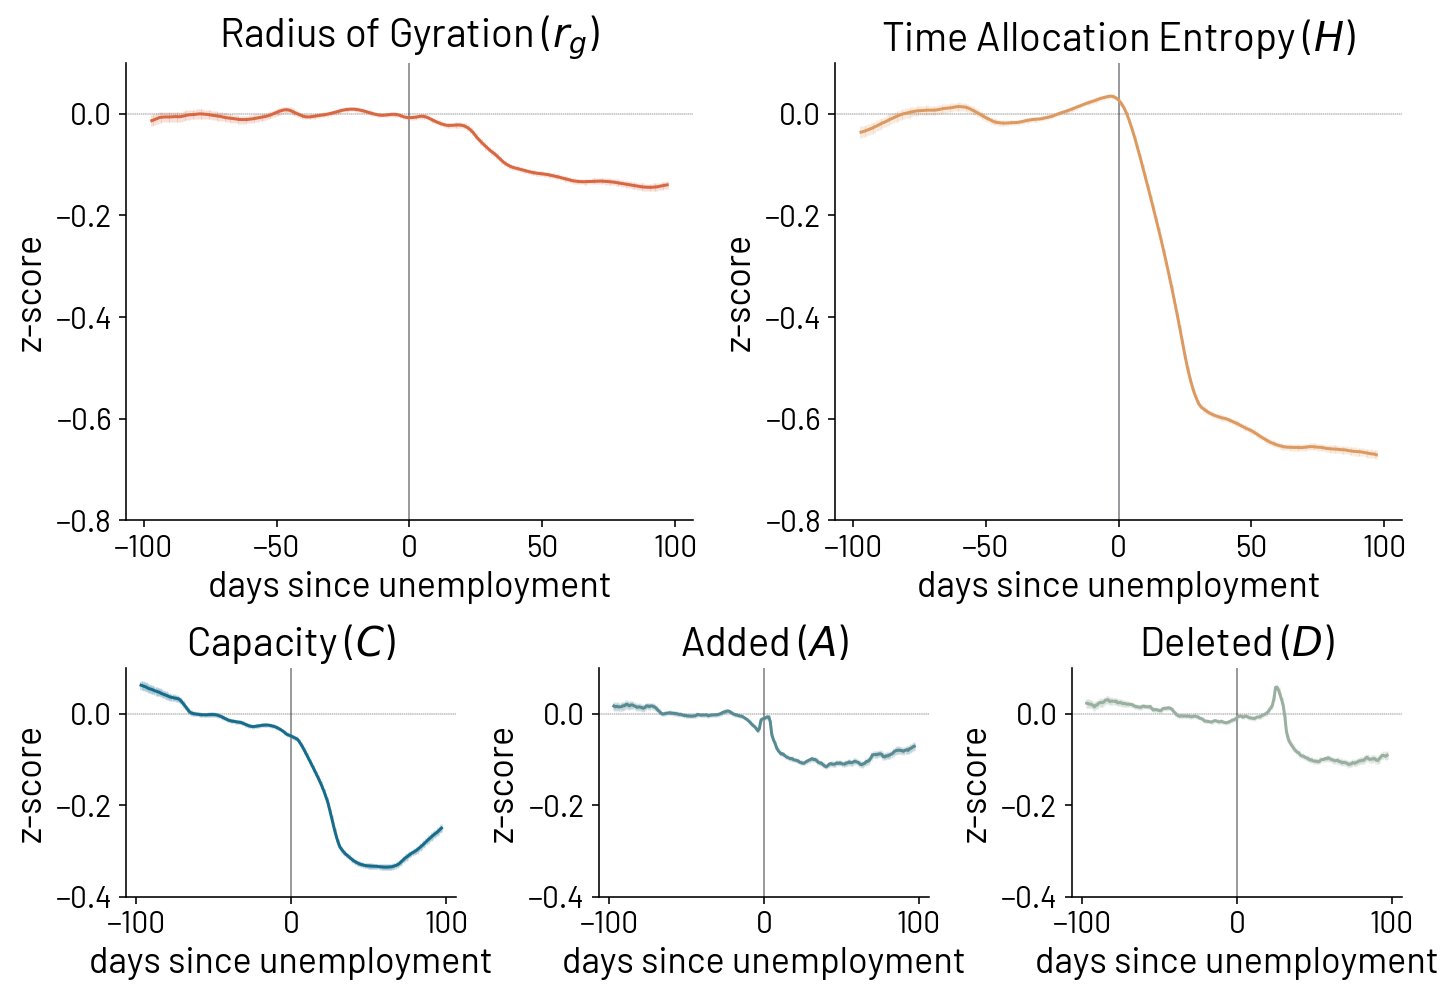

In [7]:
fig = plt.figure(figsize=(10,7))
axd = fig.subplot_mosaic(
    [
        ['a','a','a','b','b','b'],
        ['c','c','d','d','e','e']
    
    ], gridspec_kw=dict(height_ratios=[1, 0.5])
)
# identify_axes(axd)

########### RADIUS #############
metric = 'radius_gyr_time'
_, _, bars = axd['a'].errorbar(data[f'zscore_{metric}'].index, data[f'zscore_{metric}'].rolling(7, center=True).mean().values, yerr=2*data[f'sem_{metric}'], color=my_palette[5], linewidth=1.5)
[bar.set_alpha(0.2) for bar in bars]
axd['a'].axvline(0, color='#999B9F', linewidth=1)
axd['a'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['a'].set_title(r'Radius of Gyration ($r_g$)', fontsize=20)
# # remove spines
axd['a'].spines['top'].set_visible(False)
axd['a'].spines['right'].set_visible(False)
axd['a'].set_ylabel('z-score', fontsize=18)
axd['a'].set_xlabel('days since unemployment', fontsize=18)
axd['a'].tick_params(axis='both', which='major', labelsize=15)
axd['a'].set_ylim([-0.8,0.1])


########### ENTROPY #############
metric = 'entropy_of_places_time'
_, _, bars = axd['b'].errorbar(data[f'zscore_{metric}'].index, data[f'zscore_{metric}'].rolling(7, center=True).mean().values, yerr=2*data[f'sem_{metric}'], color=my_palette[6], linewidth=1.5)
[bar.set_alpha(0.2) for bar in bars]
axd['b'].axvline(0, color='#999B9F', linewidth=1)
axd['b'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['b'].set_title(r'Time Allocation Entropy ($H$)', fontsize=20)
# remove spines
axd['b'].spines['top'].set_visible(False)
axd['b'].spines['right'].set_visible(False)
axd['b'].set_ylabel('z-score', fontsize=18)
axd['b'].set_xlabel('days since unemployment', fontsize=18)
axd['b'].tick_params(axis='both', which='major', labelsize=15)
axd['b'].set_ylim([-0.8,0.1])

########### CAPACITY #############
metric = 'C'

_, _, bars = axd['c'].errorbar(data[f'zscore_{metric}'].index, data[f'zscore_{metric}'].rolling(7, center=True).mean().values, yerr=2*data[f'sem_{metric}'], color=my_palette[2], linewidth=1.5)
[bar.set_alpha(0.2) for bar in bars]
axd['c'].axvline(0, color='#999B9F', linewidth=1)
axd['c'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['c'].set_title(r'Capacity ($C$)', fontsize=20)
# remove spines
axd['c'].spines['top'].set_visible(False)
axd['c'].spines['right'].set_visible(False)
axd['c'].set_ylabel('z-score', fontsize=18)
axd['c'].set_xlabel('days since unemployment', fontsize=18)
axd['c'].tick_params(axis='both', which='major', labelsize=15)
axd['c'].set_ylim([-0.4,0.1])

########### ADDED #############
metric = 'A'
_, _, bars = axd['d'].errorbar(data[f'zscore_{metric}'].index, data[f'zscore_{metric}'].rolling(7, center=True).mean().values, yerr=2*data[f'sem_{metric}'], color=my_palette[3], linewidth=1.5)
[bar.set_alpha(0.2) for bar in bars]
axd['d'].axvline(0, color='#999B9F', linewidth=1)
axd['d'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['d'].set_title(r'Added ($A$)', fontsize=20)
# remove spines
axd['d'].spines['top'].set_visible(False)
axd['d'].spines['right'].set_visible(False)
axd['d'].set_ylabel('z-score', fontsize=18)
axd['d'].set_xlabel('days since unemployment', fontsize=18)
axd['d'].tick_params(axis='both', which='major', labelsize=15)
axd['d'].set_ylim([-0.4,0.1])

########### DELETED #############
metric = 'D'
_, _, bars = axd['e'].errorbar(data[f'zscore_{metric}'].index, data[f'zscore_{metric}'].rolling(7, center=True).mean().values, yerr=2*data[f'sem_{metric}'], color=my_palette[4], linewidth=1.5)
[bar.set_alpha(0.2) for bar in bars]
axd['e'].axvline(0, color='#999B9F', linewidth=1)
axd['e'].axhline(0, color='black', ls='--', linewidth=0.2)

axd['e'].set_title(r'Deleted ($D$)', fontsize=20)
# remove spines
axd['e'].spines['top'].set_visible(False)
axd['e'].spines['right'].set_visible(False)
axd['e'].set_ylabel('z-score', fontsize=18)
axd['e'].set_xlabel('days since unemployment', fontsize=18)
axd['e'].tick_params(axis='both', which='major', labelsize=15)
axd['e'].set_ylim([-0.4,0.1])


plt.tight_layout()